In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("HousingData.csv")

In [7]:
meanAge = df['AGE'].mean().astype(int)
df["AGE"].fillna(meanAge,inplace=True)
df = df.dropna()
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

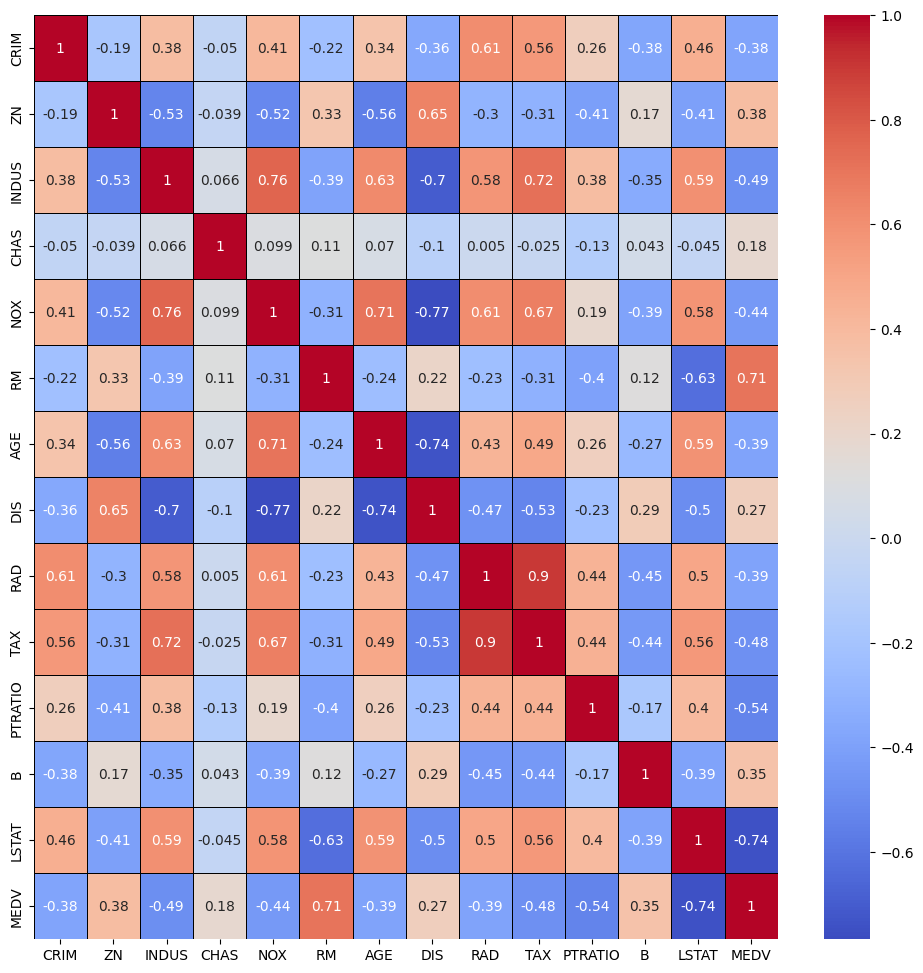

In [9]:
corrMat = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corrMat, annot=True, cmap="coolwarm",linecolor="black",linewidths=0.5)


In [10]:
x = df.drop(columns=['MEDV'])#excluding the target variable 'MEDV'.
y = df['MEDV']#contains the target variable 'MEDV'.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()#LinearRegression() creates an instance of the linear regression model.
#fit is a method that trains the model using the training data (xTrain, yTrain).
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
#predict is a method that uses the trained model to make predictions on the testing data (xTest).

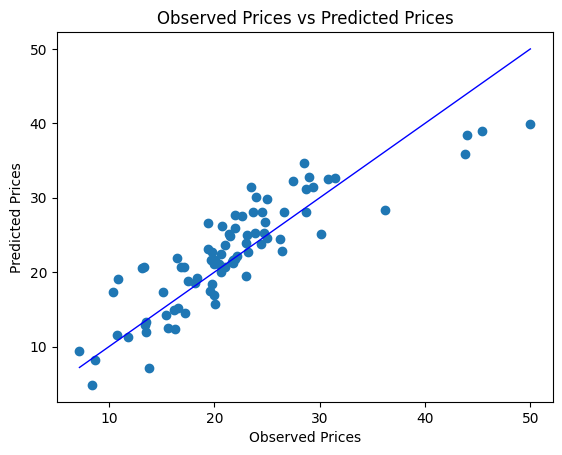

In [12]:
plt.scatter(yTest, yPred, label='Actual vs Predicted')
plt.plot([min(yTest), max(yTest)], [min(yTest), max(yTest)], linestyle='-', color='blue', linewidth=1, label='y=x')
plt.xlabel("Observed Prices")
plt.ylabel("Predicted Prices")
plt.title("Observed Prices vs Predicted Prices")
plt.show()
#This code creates a scatter plot comparing the actual target values (yTest) against the predicted values (yPred). It also includes a reference line (y=x) to visually assess how well the predictions align with the actual values.

In [13]:
r_squared = model.score(xTest,yTest)
print(f"R-squared Score: {r_squared*100}")
#model.score calculates the R-squared score, a measure of how well the model explains the variance in the testing data.

R-squared Score: 75.04607634614923


In [14]:
print("Intercept: ",model.intercept_)
print("Slope: ",model.coef_[0])
#model.intercept_ represents the y-intercept of the linear regression model.
#model.coef_[0] represents the slope (coefficients) of the features.

Intercept:  37.500410145918536
Slope:  -0.07617301704940524


In [15]:
# Calculate residuals
residuals = yPred - yTest

# Calculate squared residuals
squared_residuals = residuals**2

# Calculate Mean Squared Error (MSE)
mse = np.mean(squared_residuals)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.8989755968279995


In [16]:

# Calculate residuals
residuals = yPred - yTest

# Calculate squared residuals
squared_residuals = residuals**2

# Calculate Mean Squared Error (MSE)
mse = np.mean(squared_residuals)

# Print MSE
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 15.202010704660255
